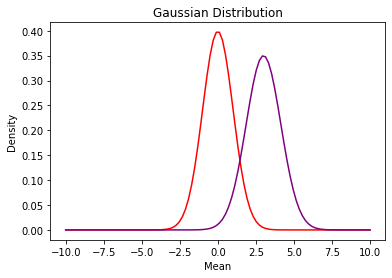

In [1]:
# Q.1(a)

#import packages
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats import norm

#define variables
x = np.linspace(-10,10,100)
y1=norm.pdf(x,0,1)
y2=norm.pdf(x,3,1.14)

#plot Graph
plt.plot(x,y1,color='red')
plt.plot(x,y2,color='purple')
plt.title('Gaussian Distribution')
plt.xlabel('Mean')
plt.ylabel('Density')
plt.show()

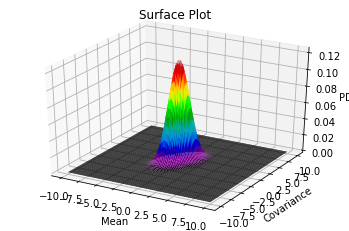

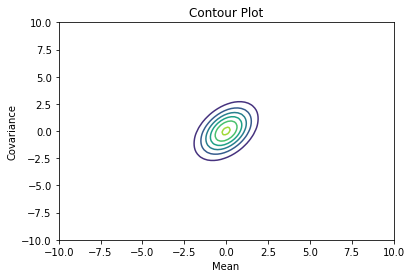

In [2]:
# Q.1(b)

#import packages
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#define variables
mean = np.array([0,0])
cov = np.array([[1,0.6],[0.6,2]])

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
x, y = np.meshgrid(x,y)
pos = np.dstack((x,y))
rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)

# Surface Plot 
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_surface(x,y,z,rstride=1, cstride=1,cmap=cm.nipy_spectral)
ax.set_title('Surface Plot')
ax.set_xlabel('Mean')
ax.set_ylabel('Covariance')
ax.set_zlabel('PDF')
plt.show()

# Contour Plot
fig, ax = plt.subplots(1,1)
ax.contour(x,y,z)
ax.set_title('Contour Plot')
ax.set_xlabel('Mean')
ax.set_ylabel('Covariance')
plt.show()

In [6]:
# Q.2
#import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#define data
data = pd.read_csv('iris.data')
data.head()
data.groupby('Species_name').size()

#convert alphabets to numerical values
le =LabelEncoder()

data['Species_name'] = le.fit_transform(data['Species_name'])
data.head()

#define true value and predicted value variables
X = data.drop(columns = ['Species_name'])
Y = data['Species_name']

#define test values equals to 30% of total
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30)

model = GaussianNB()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)

#compare true vale and predicted values
y_compare = pd.DataFrame({'true values':y_test,'predicted values':y_pred})
print(y_compare)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

     true values  predicted values
113            2                 2
32             0                 0
39             0                 0
4              0                 0
116            2                 2
125            2                 2
91             1                 1
107            2                 2
78             1                 1
82             1                 1
57             1                 1
138            2                 2
27             0                 0
42             0                 0
129            2                 2
85             1                 1
115            2                 2
148            2                 2
104            2                 2
44             0                 0
137            2                 2
55             1                 1
74             1                 1
63             1                 1
76             1                 1
73             1                 1
102            2                 2
33             0    

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 19]], dtype=int64)